In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat

In [4]:
data = loadmat('data/T1-3_Corrs.mat')
ROIs = loadmat('data/T1-3_ROIs.mat')

In [5]:
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'corrs'])

In [6]:
ROI_labels = []
#np.shape((ROIs['rois']))[1]
ROIs['rois'][:,:]

for i in range(np.shape((ROIs['rois']))[1]):
     ROI_labels.append(ROIs['rois'][:,i][0][0])
        
ROI_labels
np.shape(ROI_labels)

#note, need to remove all non 264 atlas ROIs from both index and column later

(270,)

In [7]:
np.shape(data['corrs'][:,:,1])

(270, 270)

In [8]:
mats = []
for i in range(data['corrs'].shape[-1]):
    patient_conn = pd.DataFrame((data['corrs'][:,:,i]), columns = ROI_labels, index = ROI_labels)
    patient_conn = patient_conn.filter(regex='264', axis = 1)
    patient_conn = patient_conn.filter(regex='264', axis = 0)
    mats.append(patient_conn)

In [9]:
print(np.shape(mats[0]))
mats[0] = mats[0].fillna(1)
np.min(mats[1])

(264, 264)


BN_Atlas_264_2mm_wkbrois.L_Amyg_mAmyg (medial amygdala)     0.010085
BN_Atlas_264_2mm_wkbrois.R_Amyg_mAmyg (medial amygdala)     0.000489
BN_Atlas_264_2mm_wkbrois.L_Amyg_lAmyg (lateral amygdala)    0.003256
BN_Atlas_264_2mm_wkbrois.R_Amyg_lAmyg (lateral amygdala)    0.000021
BN_Atlas_264_2mm_wkbrois.L_SFG_A8m (medial area 8)          0.000089
                                                              ...   
BN_Atlas_264_2mm_wkbrois.R_SN                               0.000268
BN_Atlas_264_2mm_wkbrois.L_VTA                              0.004399
BN_Atlas_264_2mm_wkbrois.R_VTA                              0.003903
BN_Atlas_264_2mm_wkbrois.L_PAG                              0.007442
BN_Atlas_264_2mm_wkbrois.R_PAG                              0.000902
Length: 264, dtype: float64

,BN_Atlas_264_2mm_wkbrois.L_Amyg_mAmyg (medial amygdala),BN_Atlas_264_2mm_wkbrois.R_Amyg_mAmyg (medial amygdala),BN_Atlas_264_2mm_wkbrois.L_Amyg_lAmyg (lateral amygdala),BN_Atlas_264_2mm_wkbrois.R_Amyg_lAmyg (lateral amygdala),BN_Atlas_264_2mm_wkbrois.L_SFG_A8m (medial area 8),BN_Atlas_264_2mm_wkbrois.R_SFG_A8m (medial area 8),BN_Atlas_264_2mm_wkbrois.L_SFG_A8dl (dorsolateral area 8),BN_Atlas_264_2mm_wkbrois.R_SFG_A8dl (dorsolateral area 8),BN_Atlas_264_2mm_wkbrois.L_SFG_A9l (lateral area 9),BN_Atlas_264_2mm_wkbrois.R_SFG_A9l (lateral area 9),...,BN_Atlas_264_2mm_wkbrois.L_SI,BN_Atlas_264_2mm_wkbrois.R_SI,BN_Atlas_264_2mm_wkbrois.L_MB,BN_Atlas_264_2mm_wkbrois.R_MB,BN_Atlas_264_2mm_wkbrois.L_SN,BN_Atlas_264_2mm_wkbrois.R_SN,BN_Atlas_264_2mm_wkbrois.L_VTA,BN_Atlas_264_2mm_wkbrois.R_VTA,BN_Atlas_264_2mm_wkbrois.L_PAG,BN_Atlas_264_2mm_wkbrois.R_PAG
BN_Atlas_264_2mm_wkbrois.L_Amyg_mAmyg (medial amygdala),1.000000,0.976091,0.960615,0.893921,0.183443,0.328921,0.821431,0.719475,0.341367,0.499318,...,0.961166,0.778088,0.514670,0.275334,0.328645,0.283402,0.000000,0.000000,0.171052,0.319613
BN_Atlas_264_2mm_wkbrois.R_Amyg_mAmyg (medial amygdala),0.976077,1.000000,0.858509,0.967637,0.101136,0.348885,0.646585,0.763810,0.282259,0.608695,...,0.956788,0.972677,0.000000,0.000000,0.305624,0.900984,0.000000,0.143405,0.606657,0.661042
BN_Atlas_264_2mm_wkbrois.L_Amyg_lAmyg (lateral amygdala),0.960602,0.858495,1.000000,0.812426,0.155852,0.474756,0.643694,0.434166,0.276697,0.593949,...,0.780704,0.683058,0.460492,0.379368,0.435874,0.263273,0.319434,0.143625,0.665834,0.691154
BN_Atlas_264_2mm_wkbrois.R_Amyg_lAmyg (lateral amygdala),0.893907,0.967624,0.812440,1.000000,0.000000,0.248843,0.853828,0.591732,0.443116,0.615675,...,0.921155,0.938021,0.141106,0.105996,0.501384,0.827516,0.340761,0.471561,0.795945,0.838407
BN_Atlas_264_2mm_wkbrois.L_SFG_A8m (medial area 8),0.183430,0.101122,0.155838,0.000000,1.000000,0.992476,0.603298,0.469524,0.961662,0.671534,...,0.248045,0.122339,0.224391,0.292489,0.454599,0.261593,0.303587,0.260973,0.159514,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BN_Atlas_264_2mm_wkbrois.R_SN,0.283388,0.900998,0.263259,0.827530,0.261579,0.805101,0.230490,0.492875,0.405927,0.737306,...,0.938600,0.945869,0.473145,0.520742,0.815331,1.000000,0.904110,0.978267,0.948059,0.966508
BN_Atlas_264_2mm_wkbrois.L_VTA,0.000000,0.000000,0.319448,0.340748,0.303573,0.368147,0.299676,0.392131,0.442620,0.352341,...,0.511090,0.385399,0.944630,0.945071,0.982259,0.904096,1.000000,0.999773,0.917878,0.879437
BN_Atlas_264_2mm_wkbrois.R_VTA,0.000000,0.143391,0.143611,0.471548,0.260987,0.582604,0.294059,0.533354,0.394018,0.560492,...,0.573131,0.538490,0.957490,0.969827,0.931688,0.978253,0.999759,1.000000,0.922023,0.895532
BN_Atlas_264_2mm_wkbrois.L_PAG,0.171038,0.606643,0.665820,0.795931,0.159500,0.140307,0.178418,0.000000,0.449105,0.204248,...,0.761015,0.926484,0.128714,0.137884,0.660836,0.948045,0.917865,0.922036,1.000000,0.999924


Avg Clustering: 0.9052750737281281
Density: 0.9069305219495334
radius: 2
diameter: 2


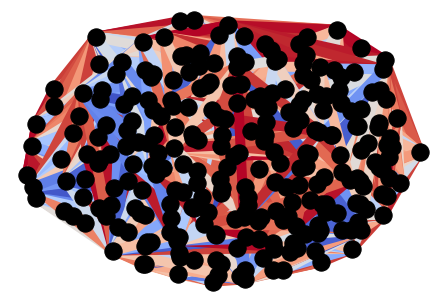

In [10]:
#make connections to self = 1
mats[0] = mats[0].fillna(1)
mats[0] = mats[0].mask(mats[0]<0.1, 0)
display(mats[0])


p1 = nx.from_pandas_adjacency(mats[0])
p1.name = 'participant_1'

edges,weights = zip(*nx.get_edge_attributes(p1,'weight').items())
pos = nx.spring_layout(p1)
nx.draw(p1, pos, node_color='black', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.coolwarm)

print("Avg Clustering: " + str(nx.average_clustering(p1)))
print("Density: " + str(nx.density(p1)))
#print("Avg Local Efficiency: " + str(nx.local_efficiency(p1)))
#print("Avg Global Efficiency: " + str(nx.global_efficiency(p1)))
print(f"radius: {nx.radius(p1)}")
print(f"diameter: {nx.diameter(p1)}")



,BN_Atlas_264_2mm_wkbrois.L_Amyg_mAmyg (medial amygdala),BN_Atlas_264_2mm_wkbrois.R_Amyg_mAmyg (medial amygdala),BN_Atlas_264_2mm_wkbrois.L_Amyg_lAmyg (lateral amygdala),BN_Atlas_264_2mm_wkbrois.R_Amyg_lAmyg (lateral amygdala),BN_Atlas_264_2mm_wkbrois.L_SFG_A8m (medial area 8),BN_Atlas_264_2mm_wkbrois.R_SFG_A8m (medial area 8),BN_Atlas_264_2mm_wkbrois.L_SFG_A8dl (dorsolateral area 8),BN_Atlas_264_2mm_wkbrois.R_SFG_A8dl (dorsolateral area 8),BN_Atlas_264_2mm_wkbrois.L_SFG_A9l (lateral area 9),BN_Atlas_264_2mm_wkbrois.R_SFG_A9l (lateral area 9),...,BN_Atlas_264_2mm_wkbrois.L_SI,BN_Atlas_264_2mm_wkbrois.R_SI,BN_Atlas_264_2mm_wkbrois.L_MB,BN_Atlas_264_2mm_wkbrois.R_MB,BN_Atlas_264_2mm_wkbrois.L_SN,BN_Atlas_264_2mm_wkbrois.R_SN,BN_Atlas_264_2mm_wkbrois.L_VTA,BN_Atlas_264_2mm_wkbrois.R_VTA,BN_Atlas_264_2mm_wkbrois.L_PAG,BN_Atlas_264_2mm_wkbrois.R_PAG
BN_Atlas_264_2mm_wkbrois.L_Amyg_mAmyg (medial amygdala),0.500000,0.476091,0.460615,0.393921,-0.316557,-0.171079,0.321431,0.219475,-0.158633,-0.000682,...,0.461166,0.278088,0.014670,-0.224666,-0.171355,-0.216598,-0.500000,-0.500000,-0.328948,-0.180387
BN_Atlas_264_2mm_wkbrois.R_Amyg_mAmyg (medial amygdala),0.476077,0.500000,0.358509,0.467637,-0.398864,-0.151115,0.146585,0.263810,-0.217741,0.108695,...,0.456788,0.472677,-0.500000,-0.500000,-0.194376,0.400984,-0.500000,-0.356595,0.106657,0.161042
BN_Atlas_264_2mm_wkbrois.L_Amyg_lAmyg (lateral amygdala),0.460602,0.358495,0.500000,0.312426,-0.344148,-0.025244,0.143694,-0.065834,-0.223303,0.093949,...,0.280704,0.183058,-0.039508,-0.120632,-0.064126,-0.236727,-0.180566,-0.356375,0.165834,0.191154
BN_Atlas_264_2mm_wkbrois.R_Amyg_lAmyg (lateral amygdala),0.393907,0.467624,0.312440,0.500000,-0.500000,-0.251157,0.353828,0.091732,-0.056884,0.115675,...,0.421155,0.438021,-0.358894,-0.394004,0.001384,0.327516,-0.159239,-0.028439,0.295945,0.338407
BN_Atlas_264_2mm_wkbrois.L_SFG_A8m (medial area 8),-0.316570,-0.398878,-0.344162,-0.500000,0.500000,0.492476,0.103298,-0.030476,0.461662,0.171534,...,-0.251955,-0.377661,-0.275609,-0.207511,-0.045401,-0.238407,-0.196413,-0.239027,-0.340486,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BN_Atlas_264_2mm_wkbrois.R_SN,-0.216612,0.400998,-0.236741,0.327530,-0.238421,0.305101,-0.269510,-0.007125,-0.094073,0.237306,...,0.438600,0.445869,-0.026855,0.020742,0.315331,0.500000,0.404110,0.478267,0.448059,0.466508
BN_Atlas_264_2mm_wkbrois.L_VTA,-0.500000,-0.500000,-0.180552,-0.159252,-0.196427,-0.131853,-0.200324,-0.107869,-0.057380,-0.147659,...,0.011090,-0.114601,0.444630,0.445071,0.482259,0.404096,0.500000,0.499773,0.417878,0.379437
BN_Atlas_264_2mm_wkbrois.R_VTA,-0.500000,-0.356609,-0.356389,-0.028452,-0.239013,0.082604,-0.205941,0.033354,-0.105982,0.060492,...,0.073131,0.038490,0.457490,0.469827,0.431688,0.478253,0.499759,0.500000,0.422023,0.395532
BN_Atlas_264_2mm_wkbrois.L_PAG,-0.328962,0.106643,0.165820,0.295931,-0.340500,-0.359693,-0.321582,-0.500000,-0.050895,-0.295752,...,0.261015,0.426484,-0.371286,-0.362116,0.160836,0.448045,0.417865,0.422036,0.500000,0.499924


Avg Clustering: 1.0
Density: 1.0076045627376427
radius: 1
diameter: 1


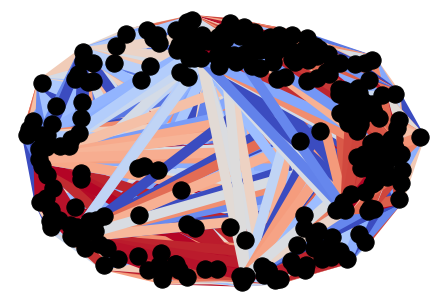

In [11]:
#Try scaling for negative to positve (-0.5 to 0.5), see what happens
#make connections to self = 1
mats[0] = mats[0].fillna(1)
mats[0] = mats[0].applymap(lambda x: x-0.5)
display(mats[0])


p1 = nx.from_pandas_adjacency(mats[0])
p1.name = 'participant_1'

edges,weights = zip(*nx.get_edge_attributes(p1,'weight').items())
pos = nx.spring_layout(p1)
nx.draw(p1, pos, node_color='black', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.coolwarm)

print("Avg Clustering: " + str(nx.average_clustering(p1)))
print("Density: " + str(nx.density(p1)))
#print("Avg Local Efficiency: " + str(nx.local_efficiency(p1)))
#print("Avg Global Efficiency: " + str(nx.global_efficiency(p1)))
print(f"radius: {nx.radius(p1)}")
print(f"diameter: {nx.diameter(p1)}")

Avg Clustering: 0.9059688022212394
Density: 0.9076794561585436
radius: 2
diameter: 2


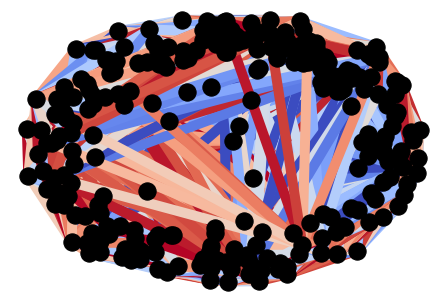

In [12]:
mats[1] = mats[1].fillna(1)
mats[1] = mats[0].mask(mats[1]<0.1, 0)

p1 = nx.from_pandas_adjacency(mats[1])
p1.name = 'participant_2'

edges,weights = zip(*nx.get_edge_attributes(p1,'weight').items())
pos = nx.spring_layout(p1)
nx.draw(p1, pos, node_color='black', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.coolwarm)

print("Avg Clustering: " + str(nx.average_clustering(p1)))
print("Density: " + str(nx.density(p1)))
#print("Avg Local Efficiency: " + str(nx.local_efficiency(p1)))
#print("Avg Global Efficiency: " + str(nx.global_efficiency(p1)))
print(f"radius: {nx.radius(p1)}")
print(f"diameter: {nx.diameter(p1)}")




In [13]:
nx.info(p1)


'Name: participant_2\nType: Graph\nNumber of nodes: 264\nNumber of edges: 31511\nAverage degree: 238.7197'

In [14]:
p3 = nx.from_pandas_adjacency(mats[2])
p3.name = 'participant_3'
nx.info(p3)

'Name: participant_3\nType: Graph\nNumber of nodes: 264\nNumber of edges: 34980\nAverage degree: 265.0000'

In [15]:
p4 = nx.from_pandas_adjacency(mats[3])
p4.name = 'participant_4'
nx.info(p4)

'Name: participant_4\nType: Graph\nNumber of nodes: 264\nNumber of edges: 34980\nAverage degree: 265.0000'

In [ ]:
for i in range(len(mats)):
    mats[i] = mats[i].fillna(1)
    #mats[i] = mats[i].mask(mats[i]<0.1, 0)
    p = nx.from_pandas_adjacency(mats[i])
    print("Avg Clustering: " + str(nx.average_clustering(p, weight = 'weight')))
    #print("Density: " + str(nx.density(p, weight = 'weight')))
    
    #these algorithms are slower:
    #print("Avg Local Efficiency: " + str(nx.local_efficiency(p)))
    #print("Avg Global Efficiency: " + str(nx.global_efficiency(p)))

Avg Clustering: (0.3481611493022739+0.1373952710939606j)
Avg Clustering: (0.3182749573925595+0.12393495120660808j)
Avg Clustering: 0.4254983886241023
Avg Clustering: 0.42319022256104044
Avg Clustering: 0.4245603914039231
Avg Clustering: 0.42597605506092917
Avg Clustering: 0.42450968160597463
Avg Clustering: 0.4250505200607656
Avg Clustering: 0.42281989746360915
Avg Clustering: 0.42314065531461853
Avg Clustering: 0.4257335773167581
Avg Clustering: 0.4243181062090727
Avg Clustering: 0.4264408351526428
Avg Clustering: 0.4240603441238791
Avg Clustering: 0.4247070975672156
Avg Clustering: 0.42456790630503344
Avg Clustering: 0.42407503076312864
Avg Clustering: 0.4250230921858453
Avg Clustering: 0.4232748697070236
Avg Clustering: 0.42378652926328875
Avg Clustering: 0.4227836288705686
Avg Clustering: 0.42291719458090987
Avg Clustering: 0.42365424900827303
Avg Clustering: 0.42411033744113324
Avg Clustering: 0.42733871205724283
Avg Clustering: 0.42402372249827636
Avg Clustering: 0.42741324470731